In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np



In [101]:
# Membaca dataset dari file CSV
data = pd.read_csv('iris.csv')
data.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Label']


In [102]:
# Memisahkan fitur (x) dan label (y)
x = data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = data['Label']

In [103]:
# Menggunakan LabelEncoder untuk mengonversi label string menjadi nilai numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)  # Menggunakan one-hot encoding

### Strategi HoldOut

In [104]:
# Memisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.2, random_state=42)

print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

119 30
119 30


### Strategi Kfold

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [106]:
clf = MLPClassifier(random_state=1, max_iter=300)
# Menggunakan KFold dengan 5 lipatan (bisa disesuaikan dengan kebutuhan)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Melakukan validasi silang (cross-validation) dan mendapatkan skor
scores = cross_val_score(clf, x, y_encoded, cv=kf)

# Menampilkan skor untuk setiap lipatan
print("Scores for each fold:", scores)


/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores for each fold: [1.         0.96666667 1.         0.96666667 0.96551724]


/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
# Menampilkan rata-rata skor dari cross-validation
print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.9797701149425289


### Strategi LeaveOnOut

In [108]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
# Melakukan validasi silang (cross-validation) dan mendapatkan skor
scores = cross_val_score(clf, x, y_encoded, cv=loo)

# Menampilkan skor untuk setiap lipatan
print("Scores for each fold:", scores)


/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bryan/.local/lib/python3.10/site-packages/skle

Scores for each fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
print(result)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

/home/bryan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


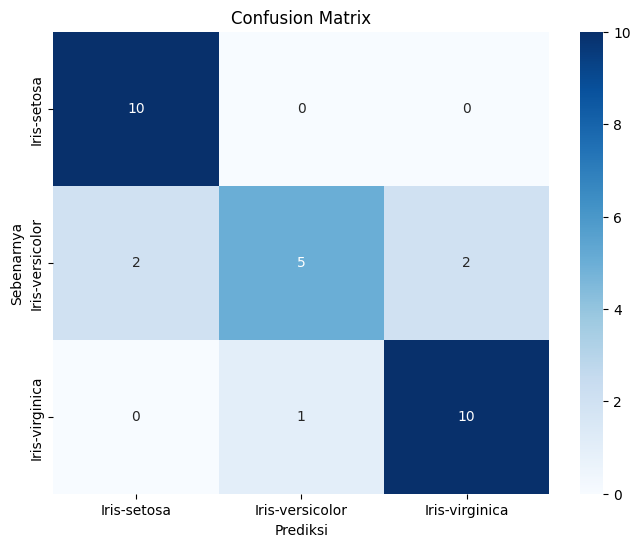

In [110]:
# Melakukan prediksi menggunakan model pada data uji
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Membuat confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Membuat visualisasi confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()